In [33]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from 2.ensemble import 
import matplotlib.pyplot as plt


In [25]:
folder = '2021-05-27'
data = pd.read_csv("data_{}.csv".format(folder)).drop(columns=['Unnamed: 0'])
data['Czas'] = pd.to_datetime(data['Czas'])
data = data.set_index('Czas')
data

,Powietrze_dystrybucyjne,Zawartosc_tlenu,Predkosc_dmuchu,Nadawa_pylow,Strata_laczna,Strata_pasa,S600,S500,S300,S100,...,Przetlenienie,Zawartosc_wegla,Zawartosc_siarki,Udzial_nadziarna,Udzial_podziarna,Poziom_topu,Kat_dystrybucji,Straty_odstojnika,Temperatura_zuzla,Drgania_kotla
Czas,,,,,,,,,,,,,,,,,,,,,
2021-05-27 00:00:00,1600.0,65.0,44.0,5.0,13.360174,0.685186,1.406598,3.737449,3.498061,4.006801,...,304.0,8.87,11.07,3.64,60.400002,240,9.590980,9.254807,1316,-1.560000
2021-05-27 00:00:01,1600.0,65.0,44.0,5.0,13.364485,0.685433,1.406957,3.738939,3.499644,4.008252,...,304.0,8.87,11.07,3.64,60.400002,250,9.581735,9.253506,1316,-1.655392
2021-05-27 00:00:02,1600.0,65.0,44.0,5.0,13.368797,0.685680,1.407317,3.740430,3.501227,4.009703,...,304.0,8.87,11.07,3.64,60.400002,250,9.572490,9.252207,1316,-1.716756
2021-05-27 00:00:03,1600.0,65.0,44.0,5.0,13.373110,0.685927,1.407676,3.741921,3.502811,4.011154,...,304.0,8.87,11.07,3.64,60.400002,250,9.563245,9.250906,1316,-1.683526
2021-05-27 00:00:04,1600.0,65.0,44.0,5.0,13.377420,0.686174,1.408035,3.743412,3.504394,4.012605,...,304.0,8.87,11.07,3.64,60.400002,250,9.554000,9.249607,1316,-1.877854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-06 22:49:55,3000.0,72.0,50.0,24.0,17.705795,0.858735,1.462337,4.117548,5.318237,5.966559,...,276.0,8.81,10.18,3.32,59.400002,1180,17.086479,10.113976,1301,0.622794
2021-06-06 22:49:56,3000.0,72.0,50.0,24.0,17.707394,0.858851,1.462500,4.117713,5.318606,5.966569,...,276.0,8.81,10.18,3.32,59.400002,1180,17.096081,10.115042,1301,0.684169
2021-06-06 22:49:57,3000.0,72.0,50.0,24.0,17.708994,0.858968,1.462663,4.117879,5.318974,5.966580,...,276.0,8.81,10.18,3.32,59.400002,1180,17.105686,10.116107,1301,0.711000


In [26]:
X, Y = data[['Powietrze_dystrybucyjne','Zawartosc_tlenu','Predkosc_dmuchu']], data['Strata_laczna']

In [38]:
Y = Y.shift(-1000)

In [39]:
# Split in train-test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False, random_state=0)

# Initialize the estimator
mdl_adaboost = RandomForestRegressor(n_estimators=500)

# Fit the data
mdl_adaboost.fit(X_train, Y_train)

# Make predictions
pred = mdl_adaboost.predict(X_test)

test_size = X_test.shape[0]

Text(0, 0.5, 'Straty łączne [MW]')

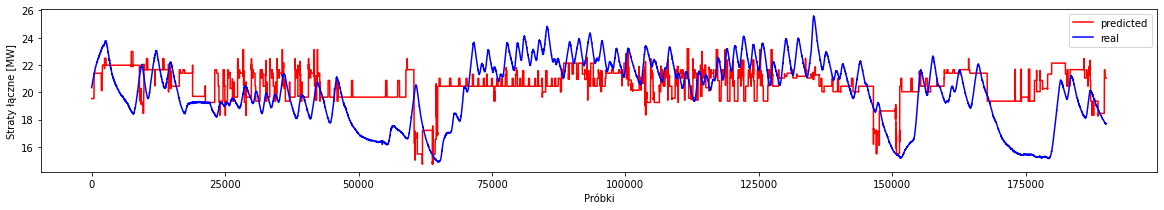

In [45]:
test_size = X_test.shape[0]
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(list(range(test_size)), pred, label='predicted', color='red')
plt.plot(list(range(test_size)), data['Strata_laczna'].tail(test_size), label='real', color='blue')
plt.legend(loc='best')
plt.xlabel('Próbki')
plt.ylabel('Straty łączne [MW]')